In [1]:


# Оставим код для импорта данных при загрузке на кегль

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))



#  БЛОК ИМПОРТА

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
from math import log as log

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification


In [3]:
import datetime
#import pandas_profiling
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV


#from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from math import log as log
import os

In [4]:
#train = pd.read_csv(path +'/train.csv')
#test = pd.read_csv(path +'test.csv')
#sample_sub = pd.read_csv(path +'/sample_submission.csv')

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample_sub = pd.read_csv('sample_submission.csv')

#  БЛОК ФУНКЦИЙ

In [5]:
def boxplot(col):
    fig, axes = plt.subplots(figsize = (14, 4))
    sns.boxplot(x='default', y=col, data=data[data['train']==1],ax=axes)
    axes.set_title('Boxplot for ' + col)
    plt.show()
    
def boxplot2(col,col2):
    fig, axes = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=col2, y=col, data=data[data['train']==1],ax=axes)
    axes.set_title('Boxplot for ' + col)
    plt.show()

# РАЗВЕДЫВАТЕЛЬНЫЙ АНАЛИЗ

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73799 entries, 0 to 73798
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         73799 non-null  int64  
 1   app_date          73799 non-null  object 
 2   education         73492 non-null  object 
 3   sex               73799 non-null  object 
 4   age               73799 non-null  int64  
 5   car               73799 non-null  object 
 6   car_type          73799 non-null  object 
 7   decline_app_cnt   73799 non-null  int64  
 8   good_work         73799 non-null  int64  
 9   score_bki         73799 non-null  float64
 10  bki_request_cnt   73799 non-null  int64  
 11  region_rating     73799 non-null  int64  
 12  home_address      73799 non-null  int64  
 13  work_address      73799 non-null  int64  
 14  income            73799 non-null  int64  
 15  sna               73799 non-null  int64  
 16  first_time        73799 non-null  int64 

выборка заполнена значениями неполностю, пропуски присутствуют 

In [7]:
print('количество строк для обучения модели', train.shape[0])
print('количество столбцов ', train.shape[1])
train.head()

количество строк для обучения модели 73799
количество столбцов  19


,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport,default
0,25905,01FEB2014,SCH,M,62,Y,Y,0,0,-2.008753,1,50,1,2,18000,4,1,N,0
1,63161,12MAR2014,SCH,F,59,N,N,0,0,-1.532276,3,50,2,3,19000,4,1,N,0
2,25887,01FEB2014,SCH,M,25,Y,N,2,0,-1.408142,1,80,1,2,30000,1,4,Y,0
3,16222,23JAN2014,SCH,F,53,N,N,0,0,-2.057471,2,50,2,3,10000,1,3,N,0
4,101655,18APR2014,GRD,M,48,N,N,0,1,-1.244723,1,60,2,3,30000,1,4,Y,0


In [8]:
print(test.info())
print('количество строк для тестирования модели', test.shape[0])
print('количество столбцов ', test.shape[1])
test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36349 entries, 0 to 36348
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         36349 non-null  int64  
 1   app_date          36349 non-null  object 
 2   education         36178 non-null  object 
 3   sex               36349 non-null  object 
 4   age               36349 non-null  int64  
 5   car               36349 non-null  object 
 6   car_type          36349 non-null  object 
 7   decline_app_cnt   36349 non-null  int64  
 8   good_work         36349 non-null  int64  
 9   score_bki         36349 non-null  float64
 10  bki_request_cnt   36349 non-null  int64  
 11  region_rating     36349 non-null  int64  
 12  home_address      36349 non-null  int64  
 13  work_address      36349 non-null  int64  
 14  income            36349 non-null  int64  
 15  sna               36349 non-null  int64  
 16  first_time        36349 non-null  int64 

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport
0,74835,22MAR2014,GRD,M,29,Y,Y,0,0,-2.271884,3,50,1,2,50000,1,4,N
1,17527,24JAN2014,SCH,F,39,N,N,5,0,-1.504999,2,50,1,2,5000,4,3,N
2,75683,23MAR2014,UGR,M,50,Y,Y,0,0,-1.691339,1,50,1,2,30000,1,3,Y
3,26883,03FEB2014,SCH,M,56,N,N,0,0,-2.374182,1,40,1,2,17000,1,3,N
4,28862,04FEB2014,GRD,F,38,N,N,0,0,-2.487502,0,80,2,3,120000,1,3,N


Из тестовых данных следует что не полностью заполнен столбец с уровнем образования

требуется заполнение пропусков

так же в датасете отсутствует столбец, обозначающий дефолт потенциального клиента кредитного продукта

In [9]:
print(sample_sub.info())
print('количество строк в сэмпл файле', sample_sub.shape[0])
print('количество столбцов ', sample_sub.shape[1])
sample_sub.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24354 entries, 0 to 24353
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   client_id  24354 non-null  int64  
 1   default    24354 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 380.7 KB
None
количество строк в сэмпл файле 24354
количество столбцов  2


,client_id,default
0,66799,0.441004
1,25379,0.138092
2,28825,0.373370
3,37530,0.476501
4,4264,0.304640


чтобы не выполнять все дальнейшие процедуры п онескольку раз (на тренировочном и тестовом датасете) - объеденим их, а для различия создадим технический столбец 'train' где у обучающей выборки будет значение 1 а у тестовой 0

In [10]:
train['train'] = 1   # обучающая выборка
test['train'] = 0    # тестовая выборка
test['default'] = -1  # т.к. изначально в тестовых данных у нас нет переменной default, создадим столбец со значениями -1
data = train.append(test, sort=False).reset_index(drop=True)

проверим результат объеденения

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110148 entries, 0 to 110147
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   client_id         110148 non-null  int64  
 1   app_date          110148 non-null  object 
 2   education         109670 non-null  object 
 3   sex               110148 non-null  object 
 4   age               110148 non-null  int64  
 5   car               110148 non-null  object 
 6   car_type          110148 non-null  object 
 7   decline_app_cnt   110148 non-null  int64  
 8   good_work         110148 non-null  int64  
 9   score_bki         110148 non-null  float64
 10  bki_request_cnt   110148 non-null  int64  
 11  region_rating     110148 non-null  int64  
 12  home_address      110148 non-null  int64  
 13  work_address      110148 non-null  int64  
 14  income            110148 non-null  int64  
 15  sna               110148 non-null  int64  
 16  first_time        11

In [12]:
display(data)

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport,default,train
0,25905,01FEB2014,SCH,M,62,Y,Y,0,0,-2.008753,1,50,1,2,18000,4,1,N,0,1
1,63161,12MAR2014,SCH,F,59,N,N,0,0,-1.532276,3,50,2,3,19000,4,1,N,0,1
2,25887,01FEB2014,SCH,M,25,Y,N,2,0,-1.408142,1,80,1,2,30000,1,4,Y,0,1
3,16222,23JAN2014,SCH,F,53,N,N,0,0,-2.057471,2,50,2,3,10000,1,3,N,0,1
4,101655,18APR2014,GRD,M,48,N,N,0,1,-1.244723,1,60,2,3,30000,1,4,Y,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110143,83775,31MAR2014,SCH,F,37,N,N,1,0,-1.744976,3,50,2,3,15000,4,1,N,-1,0
110144,106254,25APR2014,GRD,F,64,Y,Y,0,0,-2.293781,3,60,1,2,200000,1,4,N,-1,0
110145,81852,30MAR2014,GRD,M,31,N,N,2,0,-0.940752,1,50,1,2,60000,4,2,N,-1,0
110146,1971,07JAN2014,UGR,F,27,N,N,1,0,-1.242392,2,80,2,3,30000,1,1,N,-1,0


In [13]:
# Числовые переменные
num_cols = ['age','decline_app_cnt','score_bki','income','bki_request_cnt','region_rating'] 
# категориальные переменные
cat_cols = ['education','work_address','home_address','sna','first_time'] 
# бинарные переменные
bin_cols = ['sex','car','car_type','good_work','foreign_passport'] 


рассмотрим поочередно данные в зависимости от их типа

# Числовые переменные

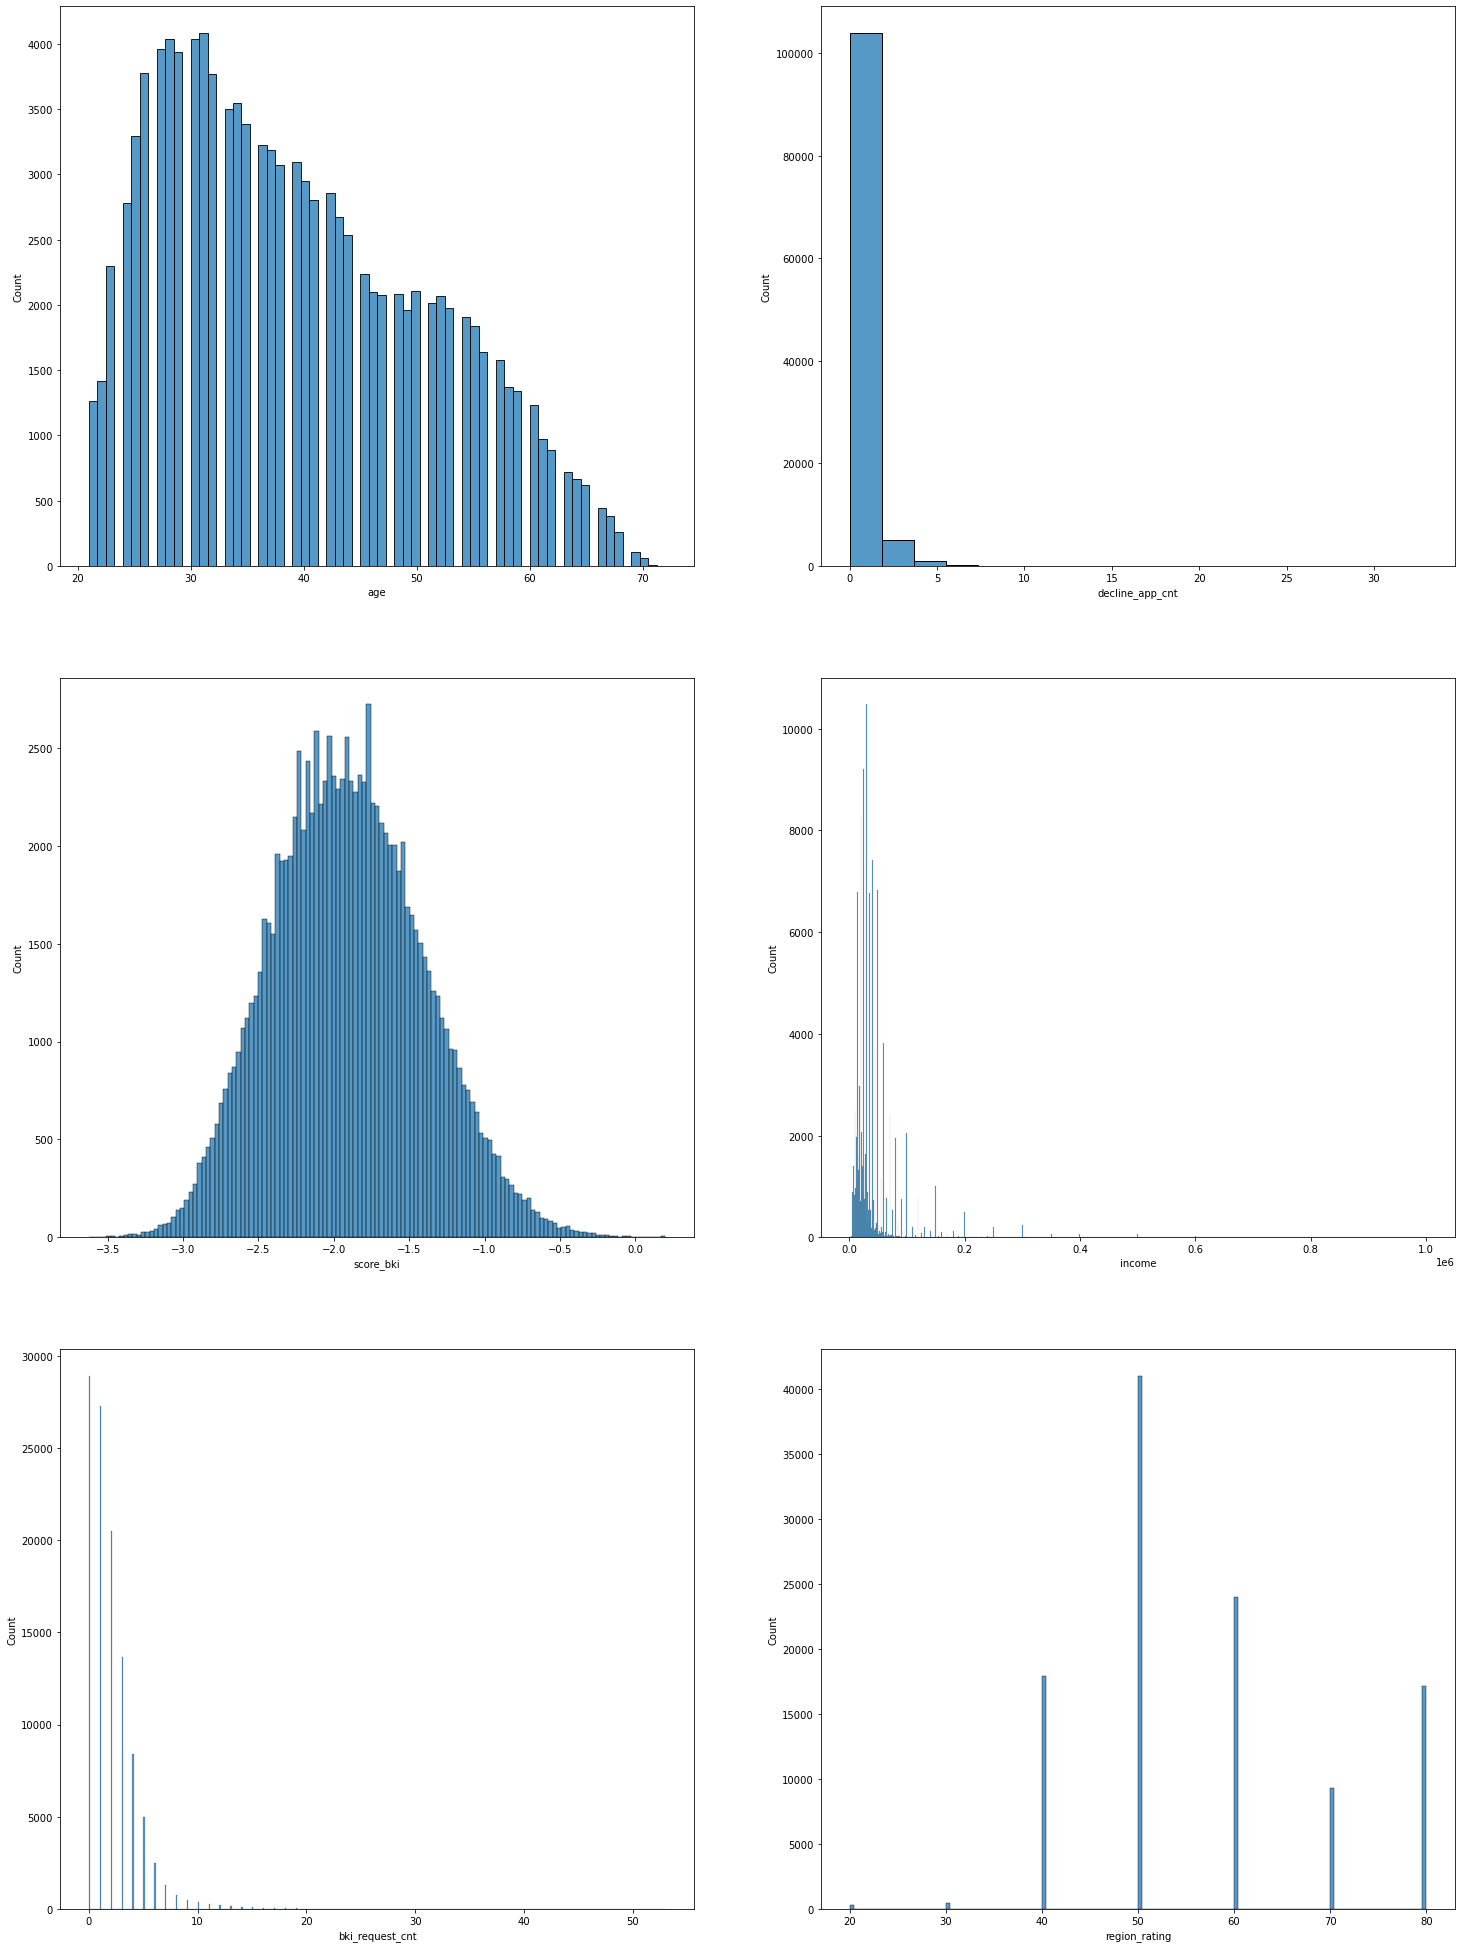

In [14]:
fig, axes = plt.subplots(3, 2, figsize=(25,35))
for i,col in enumerate(num_cols):
    sns.histplot(data[col], ax=axes.flat[i])

Только данные по score_bki и region_rating похожи на нормальное распределение, по остальным попробуем слогорифмировать данные

C:\Users\Balka\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Balka\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Balka\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

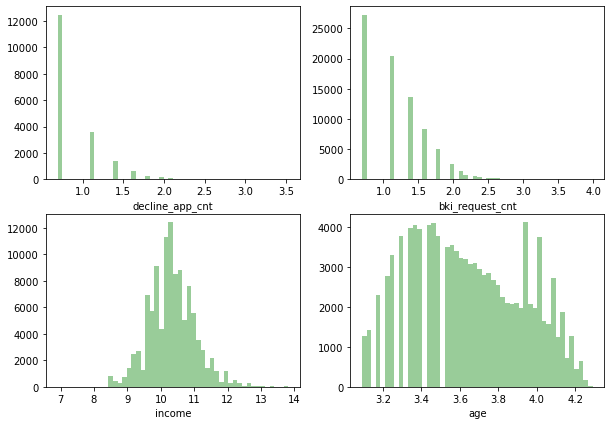

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(10,7))
for i,col in enumerate(['decline_app_cnt', 'bki_request_cnt', 'income','age']):
    data[col] = np.log(data[col] + 1)
    sns.distplot(data[col][data[col] > 0].dropna(), ax=axes.flat[i],kde = False, rug=False,color="g")
    #sns.distplot(data[col], kde=False, ax=axes.flat[i],color='g')

заметно улучшение по столбцам Income и age. но так же вино что данные возможно содержат выбросы.

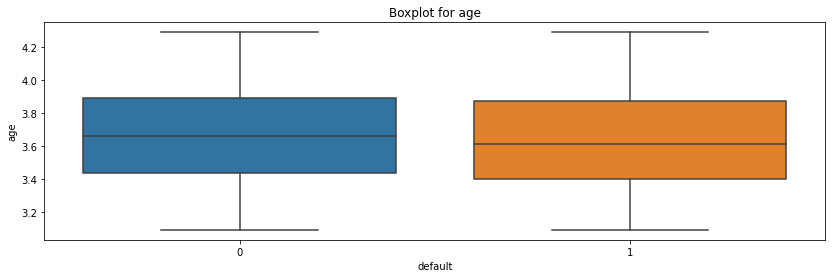

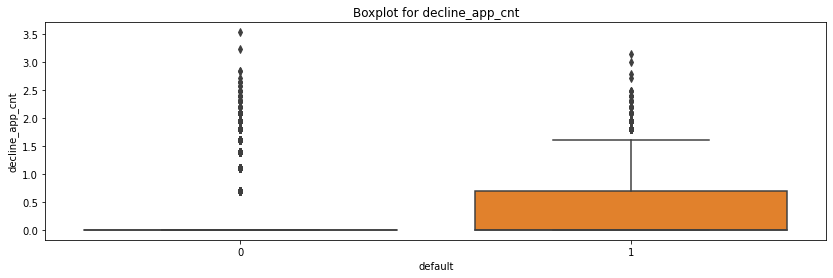

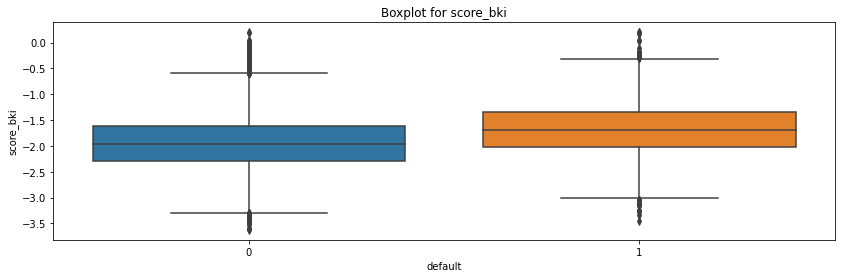

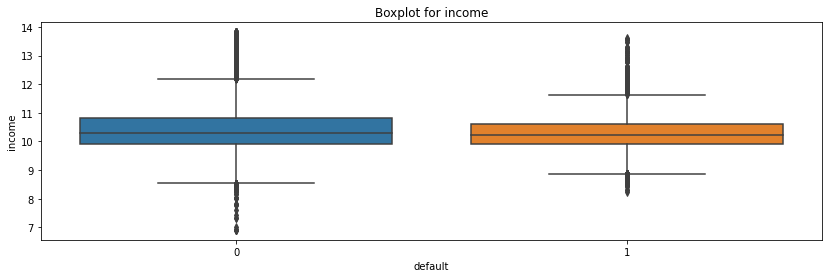

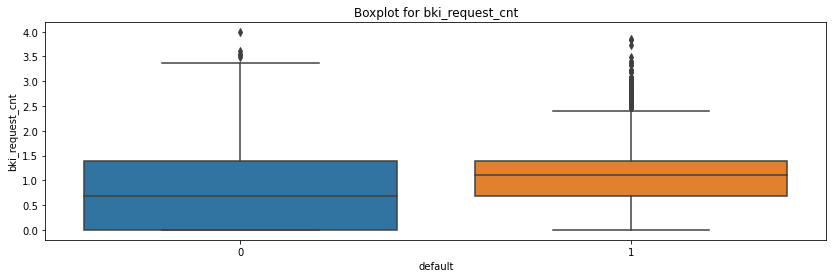

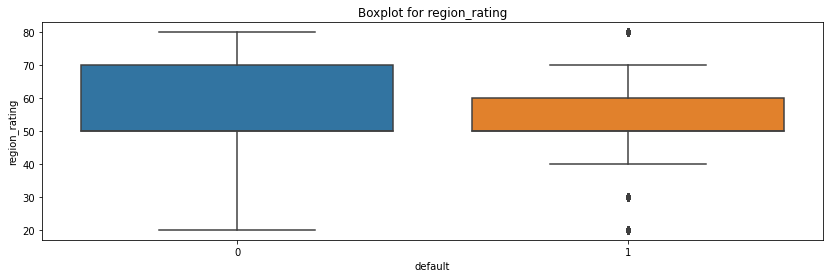

In [16]:
for col in num_cols:
    boxplot(col)

на самом деле выбросы в столбцах score bki нельзя называть таковыми, поскольку данные формирутся автоматически в Бюро кредитных историй, и очень маловероятно их завышение пользователем для обмана банка, в отличие от дохода, который, зачастую пытаются завысить для повышения одобрения заявки

# Категориальные переменные
начнем с параметра образование, содержащего пропуски и попробуем их устранить

<AxesSubplot:>

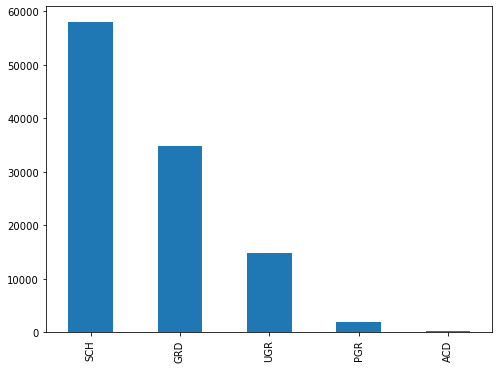

In [17]:
data.education.value_counts().plot(kind="bar",figsize=(8,6))

уровни образования обычно распределяются(по уровню) следующим образом 
* 1- sch school
* 2 - ugr - undergraduate (Bachelor)
* 3 - grd graduate degree(master)
* 4 - PGR post-Graduate Degree  or PhD
* 5 - acd Doctor’s Degree

<AxesSubplot:xlabel='education', ylabel='income'>

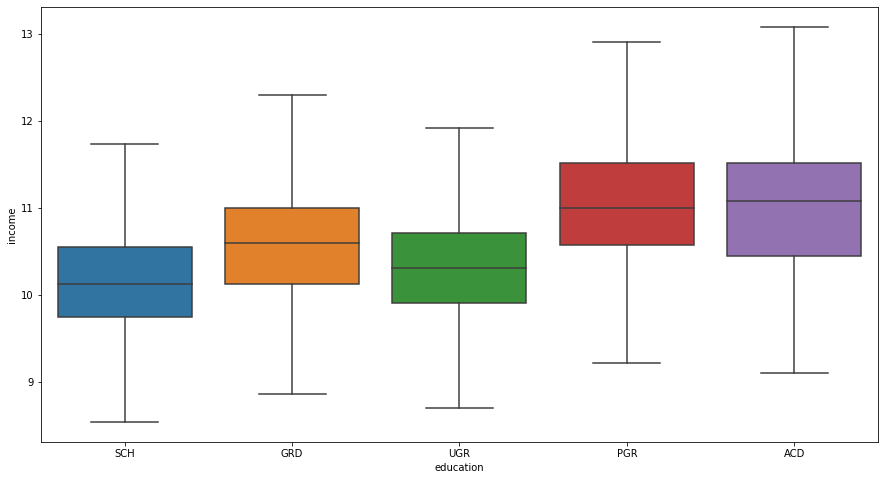

In [18]:
plt.figure(figsize=(15, 8))
sns.boxplot(x="education", y="income", data=data, showfliers=False)

как видно в среднем тенденция следующая - чем выше уровень образования тем выше заработная плата, но по данным о зарплате невозможно однозначно интерпретировать уровень образования, так что этот признак нам не подойдет для заполнения пропусков

<AxesSubplot:xlabel='education', ylabel='age'>

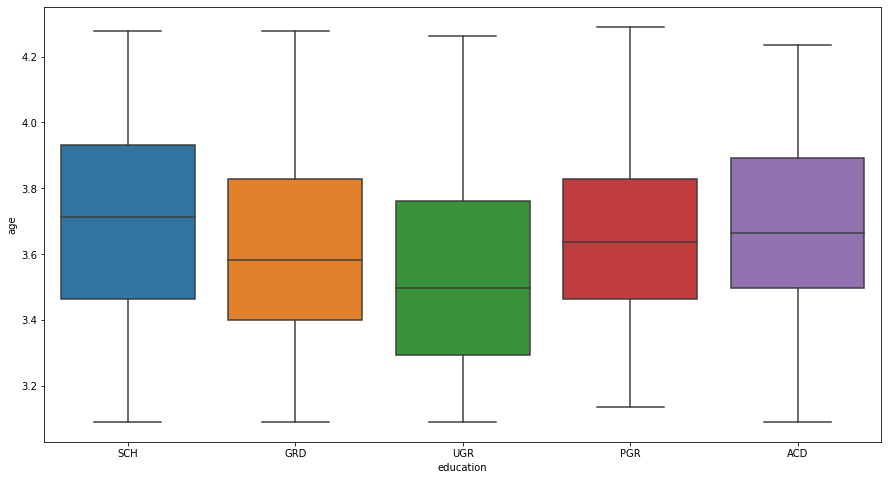

In [19]:
plt.figure(figsize=(15, 8))
sns.boxplot(x="education", y="age", data=data, showfliers=False)

По возрасту так же не получится онозначно определить уровень образования

<AxesSubplot:xlabel='education', ylabel='good_work'>

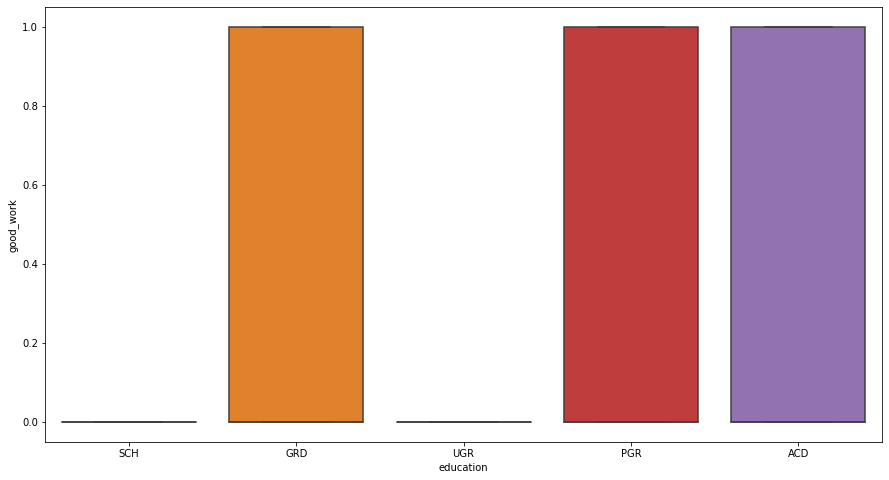

In [20]:
plt.figure(figsize=(15, 8))
sns.boxplot(x="education", y="good_work", data=data, showfliers=False)

In [21]:
for i in data.columns[2:]:
    display(data.groupby('education')[i].value_counts())

education  education
ACD        ACD            291
GRD        GRD          34768
PGR        PGR           1865
SCH        SCH          57998
UGR        UGR          14748
Name: education, dtype: int64

education  sex
ACD        M        176
           F        115
GRD        F      18940
           M      15828
PGR        M        959
           F        906
SCH        F      33663
           M      24335
UGR        F       7952
           M       6796
Name: sex, dtype: int64

education  age     
ACD        3.688879    19
           3.401197    14
           3.496508    14
           3.610918    13
           3.637586    13
                       ..
UGR        4.219508    33
           4.204693    26
           4.234107    14
           4.248495     9
           4.262680     1
Name: age, Length: 246, dtype: int64

education  car
ACD        Y        157
           N        134
GRD        N      20831
           Y      13937
PGR        Y       1053
           N        812
SCH        N      42242
           Y      15756
UGR        N       9993
           Y       4755
Name: car, dtype: int64

education  car_type
ACD        N             162
           Y             129
GRD        N           25058
           Y            9710
PGR        N            1026
           Y             839
SCH        N           50330
           Y            7668
UGR        N           12163
           Y            2585
Name: car_type, dtype: int64

education  decline_app_cnt
ACD        0.000000           261
           0.693147            19
           1.098612             7
           1.386294             1
           1.609438             1
                             ... 
UGR        2.397895             3
           2.484907             2
           2.564949             1
           2.639057             1
           3.526361             1
Name: decline_app_cnt, Length: 67, dtype: int64

education  good_work
ACD        0              158
           1              133
GRD        0            26018
           1             8750
PGR        0             1296
           1              569
SCH        0            51734
           1             6264
UGR        0            12301
           1             2447
Name: good_work, dtype: int64

education  score_bki
ACD        -2.225004    3
           -2.024100    3
           -1.775263    3
           -3.564224    1
           -3.320406    1
                       ..
UGR        -0.074266    1
           -0.015117    1
           -0.014850    1
            0.021617    1
            0.188820    1
Name: score_bki, Length: 103414, dtype: int64

education  bki_request_cnt
ACD        0.000000           86
           0.693147           77
           1.098612           55
           1.386294           33
           1.609438           14
                              ..
UGR        3.258097            1
           3.401197            1
           3.496508            1
           3.555348            1
           3.828641            1
Name: bki_request_cnt, Length: 131, dtype: int64

education  region_rating
ACD        80                 118
           50                  62
           60                  42
           40                  35
           70                  33
           30                   1
GRD        50               11865
           60                7535
           80                7009
           40                4803
           70                3262
           30                 175
           20                 119
PGR        80                 525
           50                 521
           60                 389
           40                 223
           70                 193
           30                  10
           20                   4
SCH        50               23082
           60               12734
           40               10671
           80                6688
           70                4446
           30                 209
           20                 168
UGR        50                5304
           60          

education  home_address
ACD        2                 180
           1                 107
           3                   4
GRD        2               18610
           1               15570
           3                 588
PGR        2                1013
           1                 813
           3                  39
SCH        2               31114
           1               25885
           3                 999
UGR        2                8390
           1                6125
           3                 233
Name: home_address, dtype: int64

education  work_address
ACD        3                 211
           2                  47
           1                  33
GRD        3               21203
           2                9378
           1                4187
PGR        3                1187
           2                 447
           1                 231
SCH        3               34849
           2               16841
           1                6308
UGR        3                9349
           2                3929
           1                1470
Name: work_address, dtype: int64

education  income   
ACD        11.156265    21
           10.819798    20
           11.512935    18
           11.289794    15
           11.918397    15
                        ..
UGR        13.384729     1
           13.458837     1
           13.592368     1
           13.710151     1
           13.764218     1
Name: income, Length: 2126, dtype: int64

education  sna
ACD        1        224
           4         41
           2         20
           3          6
GRD        1      24576
           2       4624
           4       3954
           3       1614
PGR        1       1432
           2        207
           4        169
           3         57
SCH        1      35051
           4      10846
           2       8572
           3       3529
UGR        1       9058
           4       2396
           2       2362
           3        932
Name: sna, dtype: int64

education  first_time
ACD        4               126
           3               111
           2                30
           1                24
GRD        3             15176
           4             10786
           2              4837
           1              3969
PGR        3               804
           4               674
           2               240
           1               147
SCH        3             24063
           4             13019
           1             11461
           2              9455
UGR        3              6261
           4              3244
           2              2624
           1              2619
Name: first_time, dtype: int64

education  foreign_passport
ACD        N                     183
           Y                     108
GRD        N                   26874
           Y                    7894
PGR        N                    1244
           Y                     621
SCH        N                   52504
           Y                    5494
UGR        N                   12521
           Y                    2227
Name: foreign_passport, dtype: int64

education  default
ACD         0           186
           -1            97
            1             8
GRD         0         21260
           -1         11403
            1          2105
PGR         0          1176
           -1           608
            1            81
SCH         0         33008
           -1         19138
            1          5852
UGR         0          8525
           -1          4932
            1          1291
Name: default, dtype: int64

education  train
ACD        1          194
           0           97
GRD        1        23365
           0        11403
PGR        1         1257
           0          608
SCH        1        38860
           0        19138
UGR        1         9816
           0         4932
Name: train, dtype: int64

ни у одного из признаков нет явной корреляции с образованием. поэтому заполним все пропуски самым частым значением

In [22]:
data['education']=data['education'].fillna('SCH')

In [23]:
display(pd.DataFrame(data.isna().value_counts()))

,,,,,,,,,,,,,,,,,,,,0
client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport,default,train,
False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,110148


Пропусков нет можем приступать дальше

<AxesSubplot:>

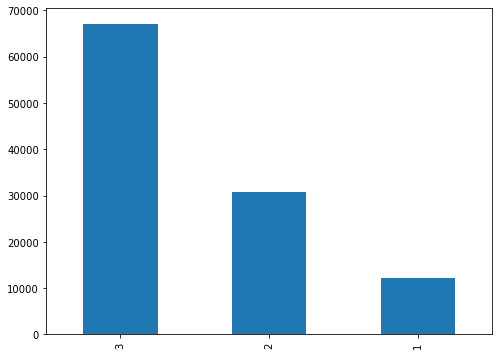

In [24]:
    data['work_address'].value_counts().plot(kind="bar",figsize=(8,6))


<AxesSubplot:>

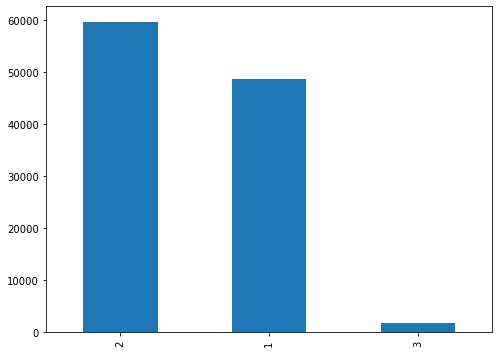

In [25]:
    data['home_address'].value_counts().plot(kind="bar",figsize=(8,6))

<AxesSubplot:>

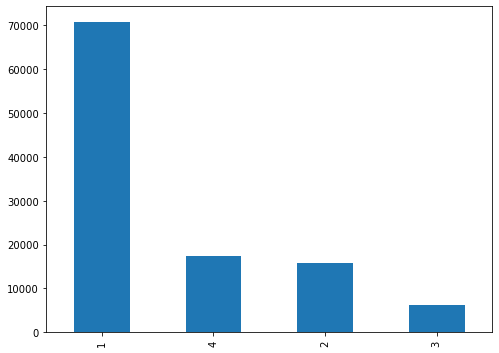

In [26]:
    data['sna'].value_counts().plot(kind="bar",figsize=(8,6))
 

<AxesSubplot:>

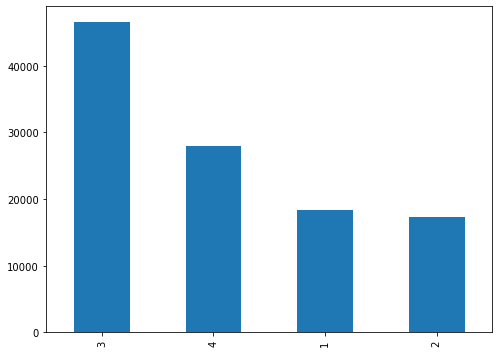

In [27]:
   data['first_time'].value_counts().plot(kind="bar",figsize=(8,6))

# бинарные переменные


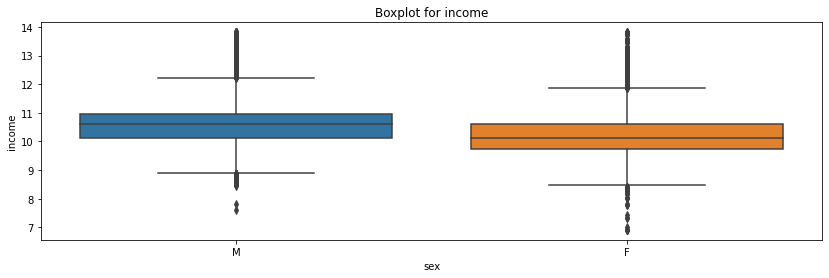

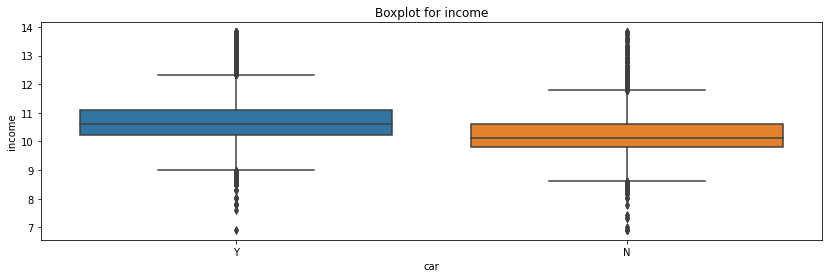

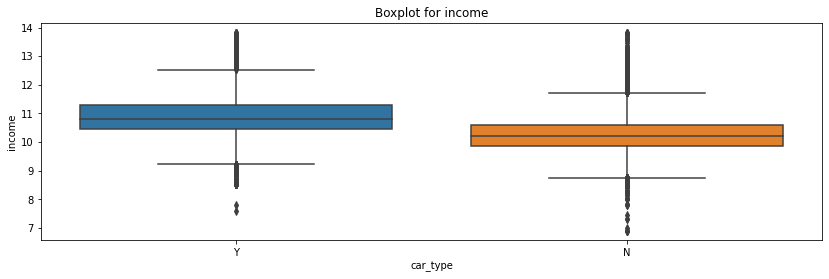

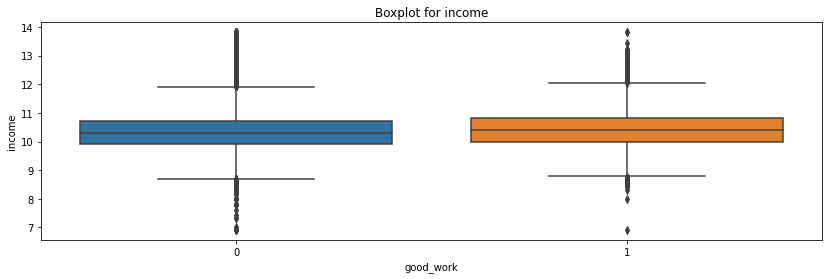

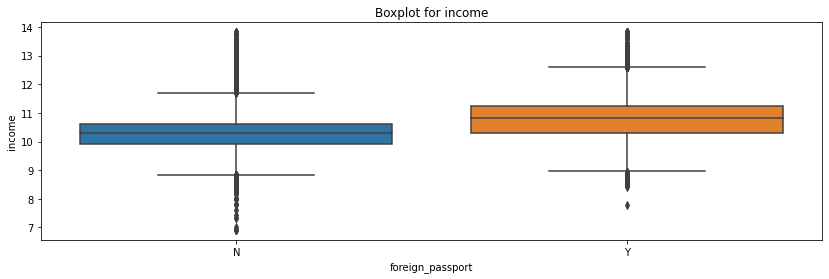

In [28]:
for col in bin_cols:
    boxplot2("income",col)

у владельцев загран паспортов заметно выше зарплата, что, впринципе и логино, мужчины в срднем получают больше жензин, у обладателей высокого дохода имеется машина, а работа престижнее


In [29]:
data['app_date'] = pd.to_datetime(data.app_date)

In [30]:
data['app_date'].sample(3)

59339   2014-04-11
25110   2014-01-28
81251   2014-04-19
Name: app_date, dtype: datetime64[ns]

In [31]:
data['app_date'].max()-data['app_date'].min()

Timedelta('119 days 00:00:00')

период выборки составляет 119 дней, или около трети от года. если бы данный параметр был большим (от года), то мы бы могли с его помощью модифицировать параметр возраста.
так же в данном периоде в экономической, социальной и политической жизни в России не было каких либо знаменательных событий, так что данный столбец можно исключить из дальнейшего рассмотрения


In [32]:
del_col=['app_date','client_id']

# EDA and feature engineering

In [33]:
mapped_data = {}
label_encoder = LabelEncoder()
for col in bin_cols:
    data[col] = label_encoder.fit_transform(data[col])
    mapped_data[col] = dict(enumerate(label_encoder.classes_))

In [34]:
mapped_data

{'sex': {0: 'F', 1: 'M'},
 'car': {0: 'N', 1: 'Y'},
 'car_type': {0: 'N', 1: 'Y'},
 'good_work': {0: 0, 1: 1},
 'foreign_passport': {0: 'N', 1: 'Y'}}

In [35]:
mapped_data_cat = {}
enc = OneHotEncoder()
for col in cat_cols:
    data[col] = label_encoder.fit_transform(data[col])
    mapped_data_cat[col] = dict(enumerate(label_encoder.classes_))

In [36]:
mapped_data_cat

{'education': {0: 'ACD', 1: 'GRD', 2: 'PGR', 3: 'SCH', 4: 'UGR'},
 'work_address': {0: 1, 1: 2, 2: 3},
 'home_address': {0: 1, 1: 2, 2: 3},
 'sna': {0: 1, 1: 2, 2: 3, 3: 4},
 'first_time': {0: 1, 1: 2, 2: 3, 3: 4}}

на основании полученной информации попробуем создать параметр успешности Sucsess. Он зависит от наличия машины, 

In [37]:
data['sucsess']=0
for col in bin_cols:
    data['sucsess']=data['sex']+data['car']+data['car_type']+data['good_work']+data['foreign_passport']
data['sucsess'].value_counts()

0    36238
1    34370
2    19727
3    14034
4     4985
5      794
Name: sucsess, dtype: int64

<AxesSubplot:>

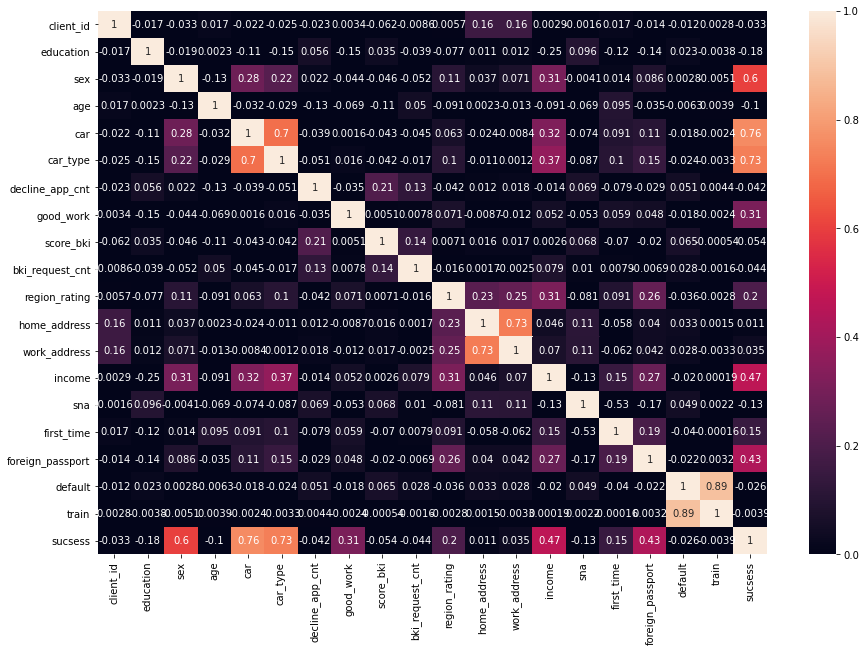

In [38]:
plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(data.corr(), vmin=0, vmax=1, annot = True)

DВидна сильная корреляция между параметрами 
* work adress и home adres
* sucsess, sex,car,cartype

In [39]:
del_col=['app_date','client_id', 'home_address','sex','car','car_type']

# Стандартизация числовых признаков

In [40]:
data[num_cols] = pd.DataFrame(StandardScaler().fit_transform(data[num_cols]), columns = data[num_cols].columns)

# Оценка значимости переменных

In [41]:
data_temp = data.loc[data['train'] == 1] # обучающая выборка

<AxesSubplot:>

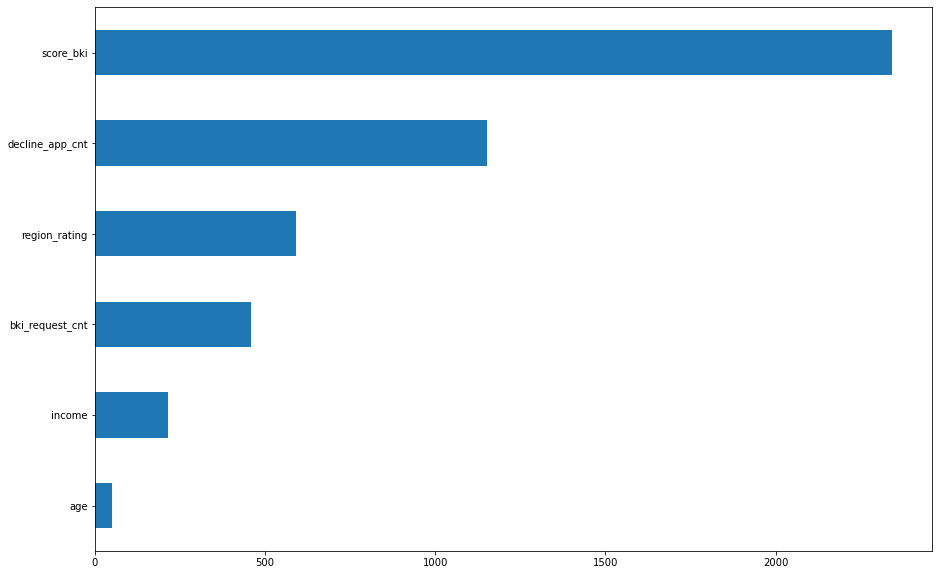

In [42]:
imp_num = pd.Series(f_classif(data_temp[num_cols], data_temp['default'])[0], index = num_cols)
imp_num.sort_values(inplace = True)
imp_num.plot(kind = 'barh')

Как можно видеть, наибольшее влияние на дефолтн оказывает признак score_bki.

<AxesSubplot:>

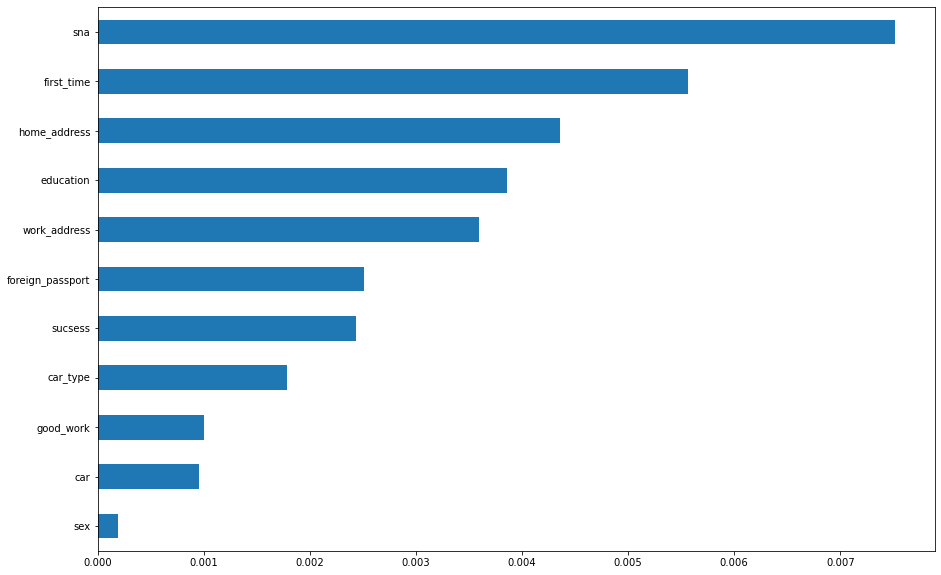

In [43]:
cats=bin_cols + cat_cols+['sucsess']
imp_cat = pd.Series(mutual_info_classif(data_temp[cats], data_temp['default'],
                                     discrete_features =True), index = cats)
imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh')

как видно искусственно созданный признак успеха коррелирует лучше его составных частей, а самый значимый признак sna, first time, home adress и education

In [44]:
data_copy=data.copy()
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110148 entries, 0 to 110147
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   client_id         110148 non-null  int64         
 1   app_date          110148 non-null  datetime64[ns]
 2   education         110148 non-null  int32         
 3   sex               110148 non-null  int32         
 4   age               110148 non-null  float64       
 5   car               110148 non-null  int32         
 6   car_type          110148 non-null  int32         
 7   decline_app_cnt   110148 non-null  float64       
 8   good_work         110148 non-null  int64         
 9   score_bki         110148 non-null  float64       
 10  bki_request_cnt   110148 non-null  float64       
 11  region_rating     110148 non-null  float64       
 12  home_address      110148 non-null  int64         
 13  work_address      110148 non-null  int64         
 14  inco

In [45]:
for col in del_col:
    print(col)
    data_copy=data_copy.drop(col, axis=1)
    
cat_cols=['education', 'work_address', 'sna', 'first_time']
data_copy = pd.get_dummies(data_copy, prefix=cat_cols, columns=cat_cols)

app_date
client_id
home_address
sex
car
car_type


In [46]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110148 entries, 0 to 110147
Data columns (total 27 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   age               110148 non-null  float64
 1   decline_app_cnt   110148 non-null  float64
 2   good_work         110148 non-null  int64  
 3   score_bki         110148 non-null  float64
 4   bki_request_cnt   110148 non-null  float64
 5   region_rating     110148 non-null  float64
 6   income            110148 non-null  float64
 7   foreign_passport  110148 non-null  int32  
 8   default           110148 non-null  int64  
 9   train             110148 non-null  int64  
 10  sucsess           110148 non-null  int64  
 11  education_0       110148 non-null  uint8  
 12  education_1       110148 non-null  uint8  
 13  education_2       110148 non-null  uint8  
 14  education_3       110148 non-null  uint8  
 15  education_4       110148 non-null  uint8  
 16  work_address_0    11

# Моделирование

In [47]:
train_df = data_copy.query('train == 1').drop(['train'], axis=1)
test_df = data_copy.query('train == 0').drop(['train'], axis=1)

In [48]:
X = train_df.drop(['default'], axis=1).values
y = train_df['default'].values # целевая переменная

In [49]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.20, random_state=42)

In [50]:
# Логистическая регрессия 
model = LogisticRegression(max_iter = 1000)

In [51]:
model.fit(X_train, y_train)
y_pred = model.predict(X_valid)

# Кривая ROC AUC

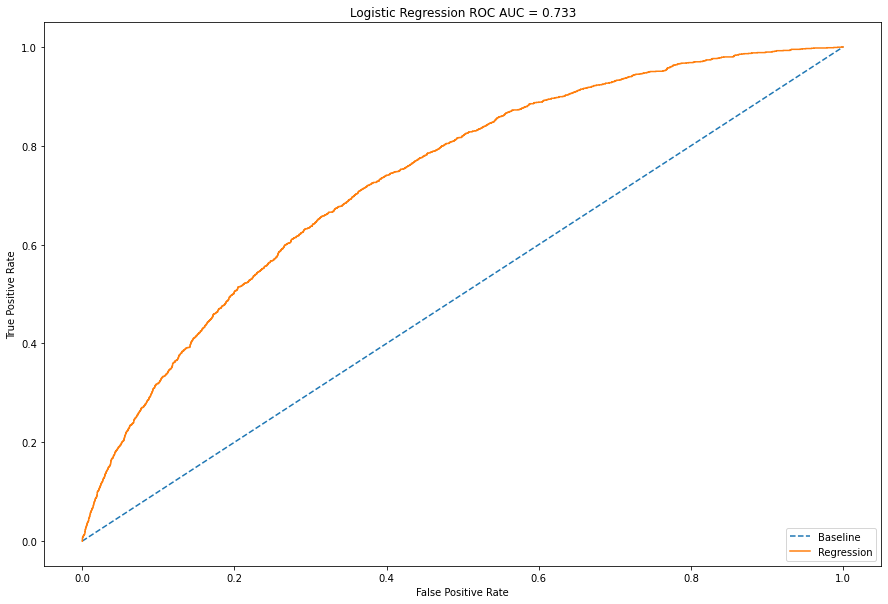

In [52]:
probs = model.predict_proba(X_valid)
probs = probs[:,1]


fpr, tpr, threshold = roc_curve(y_valid, probs)
roc_auc = roc_auc_score(y_valid, probs)

plt.figure()
plt.plot([0, 1], label='Baseline', linestyle='--')
plt.plot(fpr, tpr, label = 'Regression')
plt.title('Logistic Regression ROC AUC = %0.3f' % roc_auc)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

Значение ROC AUC показывает что мы с большой долей вероятности правильно выберем клиента. но попробуем улучшить с помощью гиперпараметров

In [53]:
print('accuracy_score:',accuracy_score(y_valid,y_pred))
print('precision_score:',precision_score(y_valid,y_pred))
print('recall_score:',recall_score(y_valid,y_pred))
print('f1_score:',f1_score(y_valid,y_pred))

accuracy_score: 0.8754065040650406
precision_score: 0.43023255813953487
recall_score: 0.020251778872468526
f1_score: 0.03868269733403032


[Text(0.5, 0, 'True'), Text(0, 0.5, 'Predicted')]

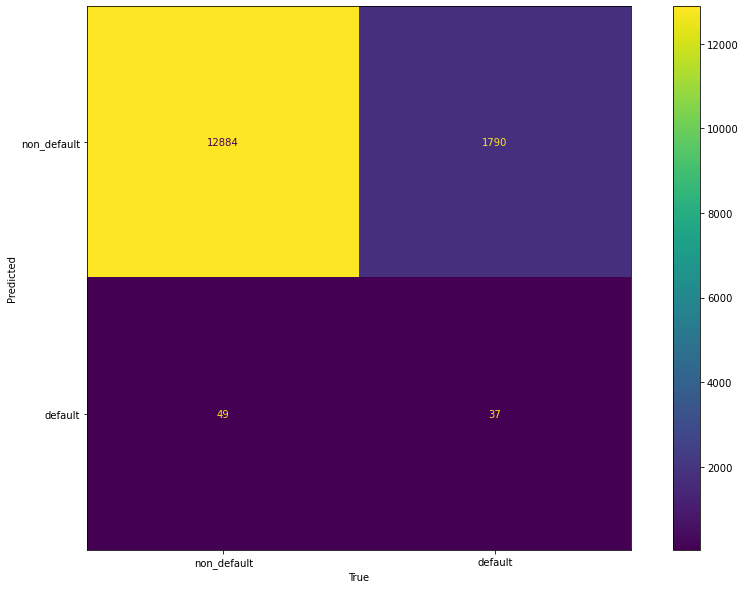

In [54]:
cm = confusion_matrix( y_pred, y_valid,)
cmd = ConfusionMatrixDisplay(cm, display_labels=['non_default','default'])
cmd.plot()
cmd.ax_.set(xlabel='True', ylabel='Predicted')

почему мы видем такую неоднозначную картину? Потому что мы однозначно обучали модель на нерелевантных данных. В нашей выборке было 64427 позитивных и 9372 негативных результата, изза чего модель хорошо предсказывает TruePositive (TP в сравнении с False Positive), но крайне плохо True negative

In [55]:
data['default'].value_counts()

 0    64427
-1    36349
 1     9372
Name: default, dtype: int64

In [56]:
train_df = data_copy.query('train == 1').drop(['train'], axis=1)
test_df = data_copy.query('train == 0').drop(['train'], axis=1)
X = train_df.drop(['default'], axis=1).values
y = train_df['default'].values # целевая переменная
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.20, random_state=42)

In [57]:
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

In [58]:
tree = DecisionTreeClassifier() # дерево решений

In [59]:
# Создание объекта RandomizedSearchCV
tree_cv = RandomizedSearchCV(tree, param_dist, cv = 5)

In [60]:
model_2 = tree_cv.fit(X_train, y_train)

In [61]:
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Результат: {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': 6, 'min_samples_leaf': 7}
Результат: 0.87220311982488


In [62]:
 tree = DecisionTreeClassifier(criterion='gini',max_depth=3, max_features=7, min_samples_leaf=5)

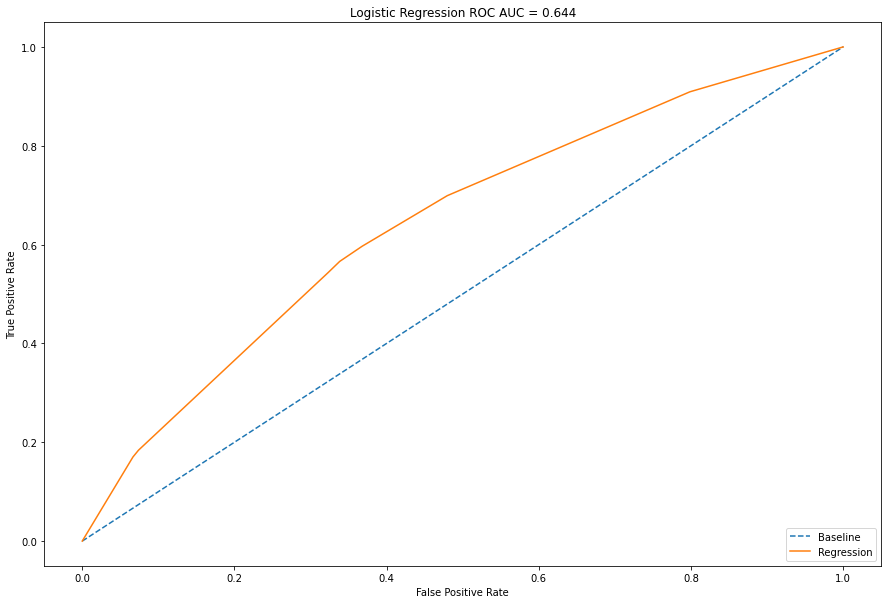

In [63]:
probs = model_2.predict_proba(X_valid)
probs = probs[:,1]


fpr, tpr, threshold = roc_curve(y_valid, probs)
roc_auc = roc_auc_score(y_valid, probs)

plt.figure()
plt.plot([0, 1], label='Baseline', linestyle='--')
plt.plot(fpr, tpr, label = 'Regression')
plt.title('Logistic Regression ROC AUC = %0.3f' % roc_auc)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

In [64]:
y_pred = model_2.predict(X_valid)
print('accuracy_score:',accuracy_score(y_valid,y_pred))
print('precision_score:',precision_score(y_valid,y_pred))
print('recall_score:',recall_score(y_valid,y_pred))
print('f1_score:',f1_score(y_valid,y_pred))

accuracy_score: 0.876219512195122
precision_score: 0.0
recall_score: 0.0
f1_score: 0.0


C:\Users\Balka\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [65]:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=6, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

RandomForestClassifier(max_features=6)

In [66]:
X, y = make_classification(n_samples=1000, n_features=4,
                            n_informative=2, n_redundant=0,
                            random_state=0, shuffle=False)
clf = RandomForestClassifier(max_depth=4, random_state=2)
model_3=clf.fit(X_train, y_train)

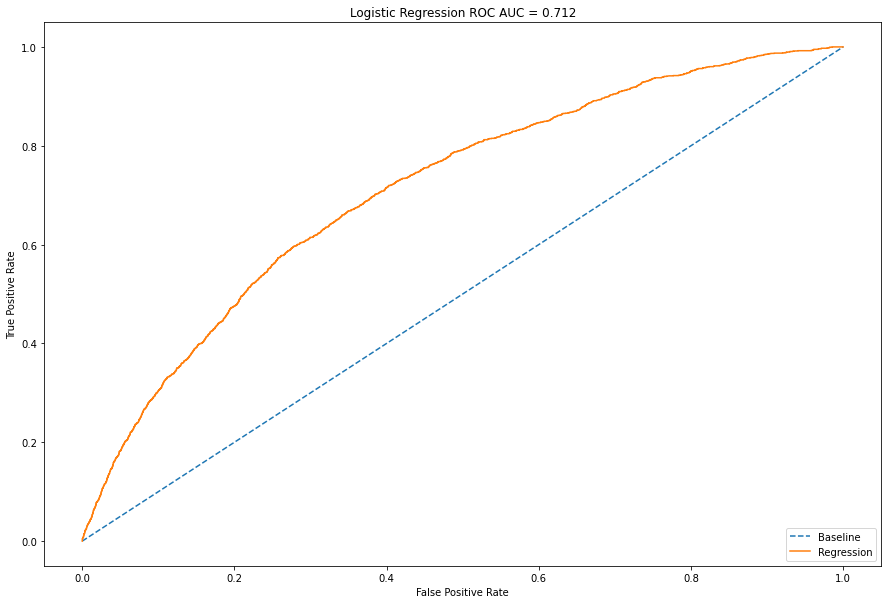

In [67]:
probs = model_3.predict_proba(X_valid)
probs = probs[:,1]


fpr, tpr, threshold = roc_curve(y_valid, probs)
roc_auc = roc_auc_score(y_valid, probs)

plt.figure()
plt.plot([0, 1], label='Baseline', linestyle='--')
plt.plot(fpr, tpr, label = 'Regression')
plt.title('Logistic Regression ROC AUC = %0.3f' % roc_auc)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 'lower right')
plt.show()



In [68]:
y_pred = model_3.predict(X_valid)
print('accuracy_score:',accuracy_score(y_valid,y_pred))
print('precision_score:',precision_score(y_valid,y_pred))
print('recall_score:',recall_score(y_valid,y_pred))
print('f1_score:',f1_score(y_valid,y_pred))

accuracy_score: 0.876219512195122
precision_score: 0.0
recall_score: 0.0
f1_score: 0.0


C:\Users\Balka\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# ВЫВОДЫ

Наилучшим образом себя показала первая модель логистической регрессии. Не смотря на то, что некоторые модели показали себя лучше со стороны других метрик, т.к. оценка производится по ROC AUC - отправляем на сабмит первую модель

Главная причина почему мы видем такую неоднозначную картину в том, что мы однозначно обучали модель на нерелевантных данных. В нашей выборке было 64427 позитивных и 9372 негативных результата, изза чего модель хорошо предсказывает TruePositive (TP в сравнении с False Positive), но крайне плохо True negative

# submission

In [69]:
train_df = data_copy.query('train == 1').drop(['train'], axis=1)
test_df = data_copy.query('train == 0').drop(['train'], axis=1)
X = train_df.drop(['default'], axis=1).values
y = train_df['default'].values # целевая переменная
X_test = test_df.drop(['default'], axis=1)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.20, random_state=42)

In [70]:
test_df.shape, train_df.shape, X.shape, y.shape, X_test.shape

((36349, 26), (73799, 26), (73799, 25), (73799,), (36349, 25))

In [73]:
top_model = LogisticRegression(random_state=42, C=1,  class_weight='balanced', dual=False, 
                            fit_intercept=True, intercept_scaling=1, l1_ratio=None, multi_class='auto',
                             n_jobs=None, penalty='l1', solver='saga',tol=0.001, verbose=0, warm_start=False,max_iter=1000)

top_model.fit(X_train, y_train)
y_pred_prob = top_model.predict_proba(X_test)[:,1]
y_pred = top_model.predict(X_test)

In [74]:
submit = pd.DataFrame(test.client_id)
submit['default']=y_pred_prob
submit.to_csv('submission.csv', index=False)


In [75]:
display(submit)

,client_id,default
0,74835,0.249597
1,17527,0.808477
2,75683,0.359412
3,26883,0.349021
4,28862,0.133361
...,...,...
36344,83775,0.802649
36345,106254,0.176641
36346,81852,0.786837
36347,1971,0.599779


In [ ]:
dfdfdf